# Demo: Extracting curve data from PDFs

The notebook demonstrates how to extract `curve` objects from PDFs using `pdfplumber`.

## Load the PDF

Here, we're using the USDA's "[National Weekly Ag Energy Round-Up](https://www.ams.usda.gov/mnreports/lswagenergy.pdf)", a weekly one-page report.

In [12]:
import pdfplumber

# file_name = "碧水源(300070)我们真正缺少的是干净水,新水源开发破解缺水难题.pdf"
# file_name = "电力行业：区域整合，火电自救的又一破局点－热点专题系列（四）-光大证券191201.pdf"
# file_name = "【长江农业】如何看待美国农产品进口？.pdf"
file_name = "页面提取自－中行.pdf"
# file_name = "20190713_国泰君安_宏观周报_ 信用流向地产和基建，制造业内外交困_花长春 韩旭 董琦 赵格格.pdf"
# report = pdfplumber.open("../pdfs/ag-energy-round-up-2017-02-24.pdf").pages[0]
# file_name = "【重命名】兴业证券报告 8.pdf"
# file_name = "大连万达商业地产股份有限公司2016年公司债券（第一期）募集说明书 50-51.pdf"
# file_name = "农林牧渔行业：猪价下跌何时休-中泰证券191201.pdf"
# file_name = "兴图新科首次公开发行股票并在科创板上市招股意向书 9.pdf"
# file_name = "无人驾驶-有图片图表.pdf"
report = pdfplumber.open("./pdfs/%s" % file_name).pages[0]

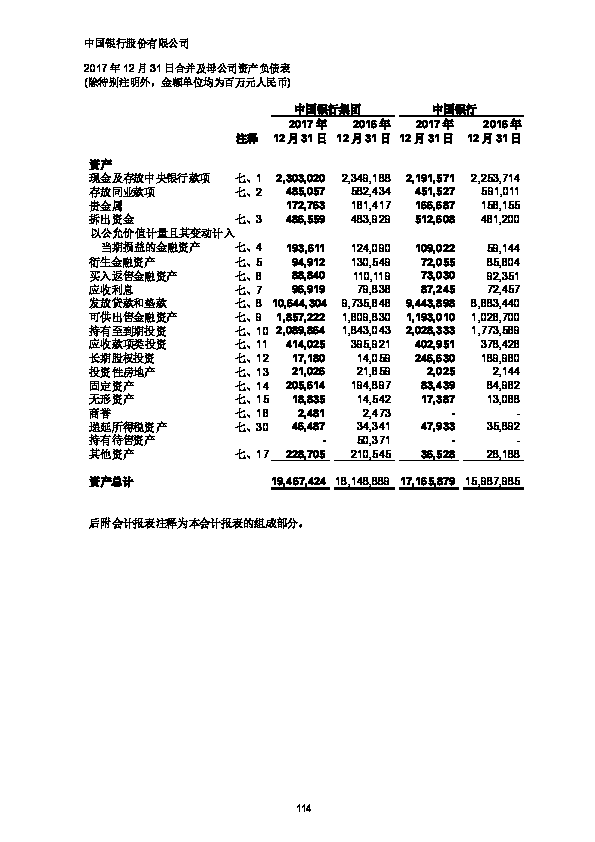

In [13]:
im = report.to_image()
im

## Examine the `curve` objects

`Page` objects have a `.curves` property, which contains a list of `curve` objects found on the page. This report contains 12 curves, four per chart:

In [4]:
len(report.curves)

2

Here's what the first `curve` object looks like:

In [6]:
# report.curves[0]

In [7]:
# report.curves[0]

In [6]:
# report.horizontal_edges[0]  # 水平线

In [7]:
# report.vertical_edges[0] # 垂直线

In [14]:
objs = report.parse_objects()
objs.keys()
# objs["line"][0]

dict_keys(['char', 'rect'])

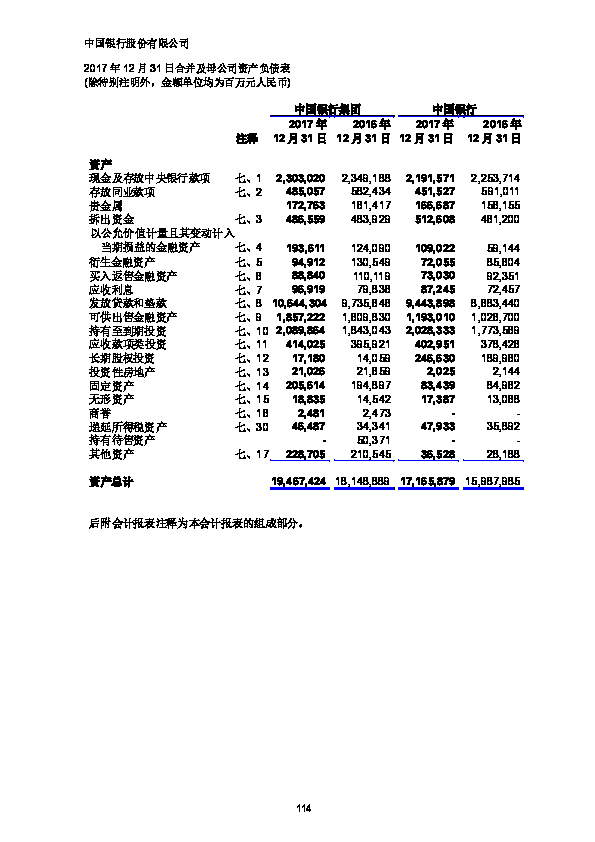

In [15]:
im = report.to_image()
# im.draw_lines(objs["char"], stroke="green", stroke_width=2)
# im.draw_lines(objs["curve"], stroke="red", stroke_width=2)
# im.draw_lines(objs["line"], stroke="yellow", stroke_width=2)
im.draw_lines(objs["rect"], stroke="blue", stroke_width=2)  # 
# im.draw_lines(objs["image"], stroke="gray", stroke_width=2)  # 方框

In [25]:
# im = report.to_image()
# im.draw_lines(objs["rect"], stroke="green", stroke_width=2)

### line

In [1]:
im = report.to_image()
im.draw_lines(objs["line"], stroke="green", stroke_width=2)

NameError: name 'report' is not defined

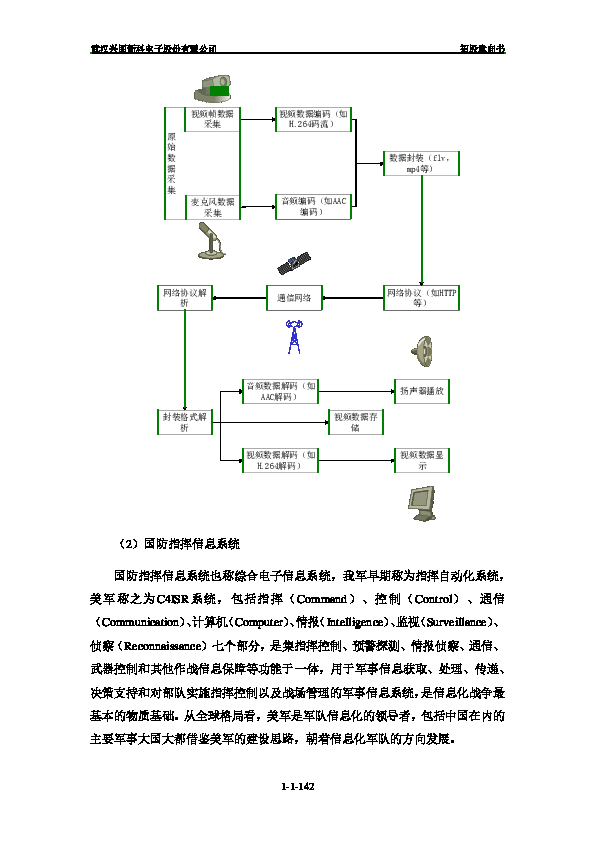

In [12]:
im = report.to_image()
im.draw_lines(report.vertical_edges, stroke="green", stroke_width=2)

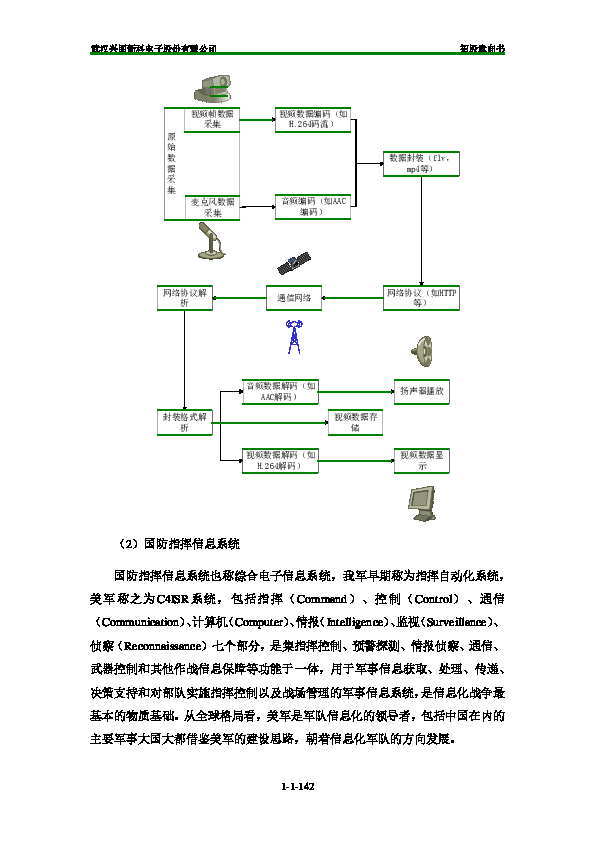

In [13]:
im = report.to_image()
im.draw_lines(report.horizontal_edges, stroke="green", stroke_width=2)

### curve

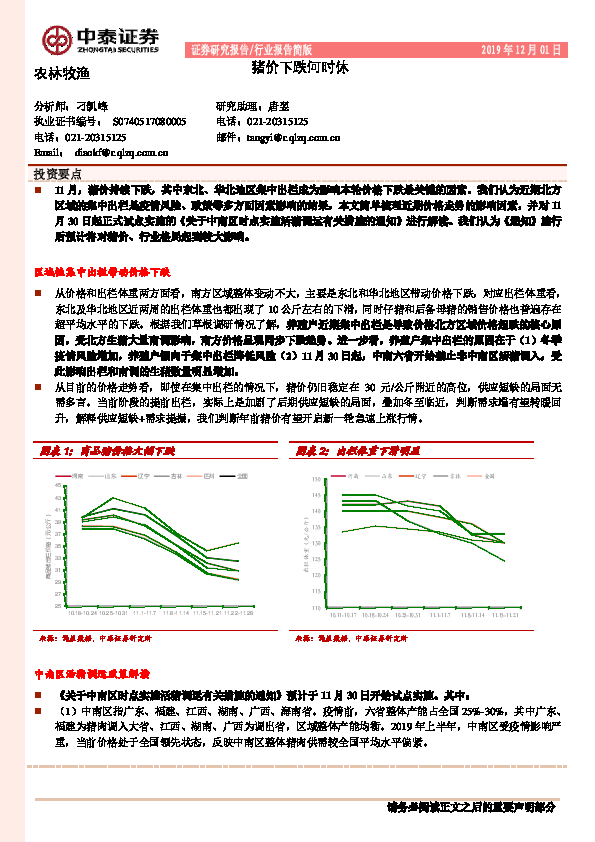

In [12]:
im = report.to_image()
im.draw_lines(objs["curve"], stroke="green", stroke_width=2)

### image

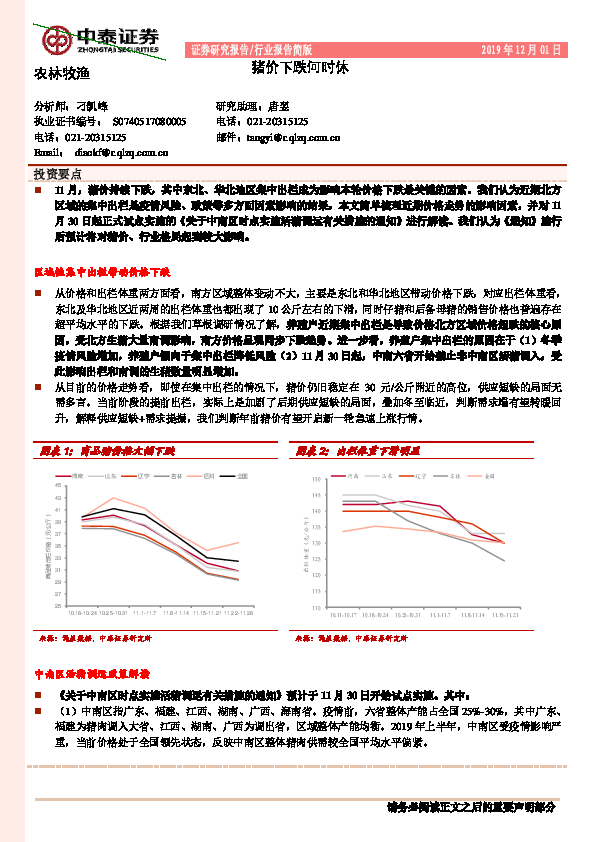

In [17]:
im = report.to_image()
im.draw_lines(objs["image"], stroke="green", stroke_width=2)

In [157]:
im = report.to_image()
# im.draw_lines(objs["image"], stroke="green", stroke_width=2)

### figure

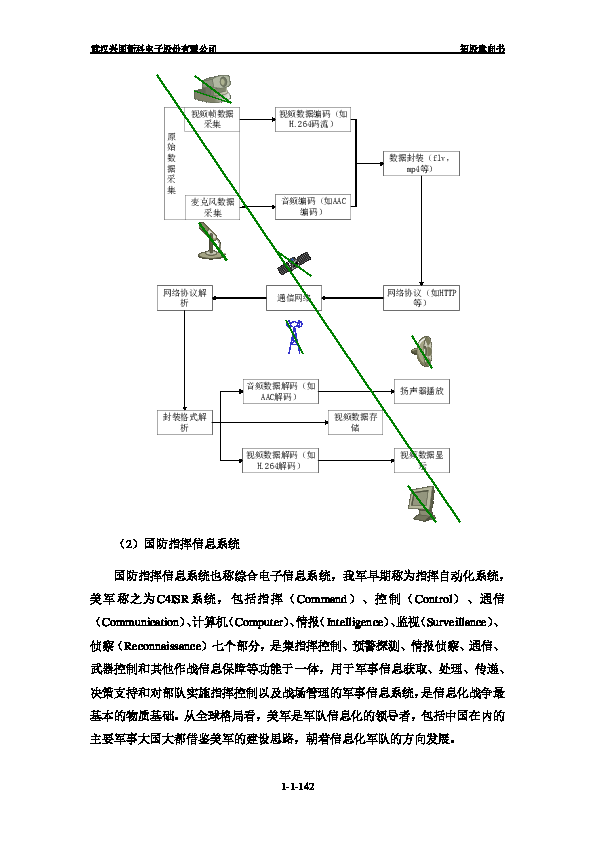

In [4]:
im = report.to_image()
im.draw_lines(objs["figure"], stroke="green", stroke_width=2)

## Display the curves

We can get a quick sense of where the curves are by passing them to `PageImage.draw_lines`:

We can get a more better sense of the curves by cycling through a four-color palette:

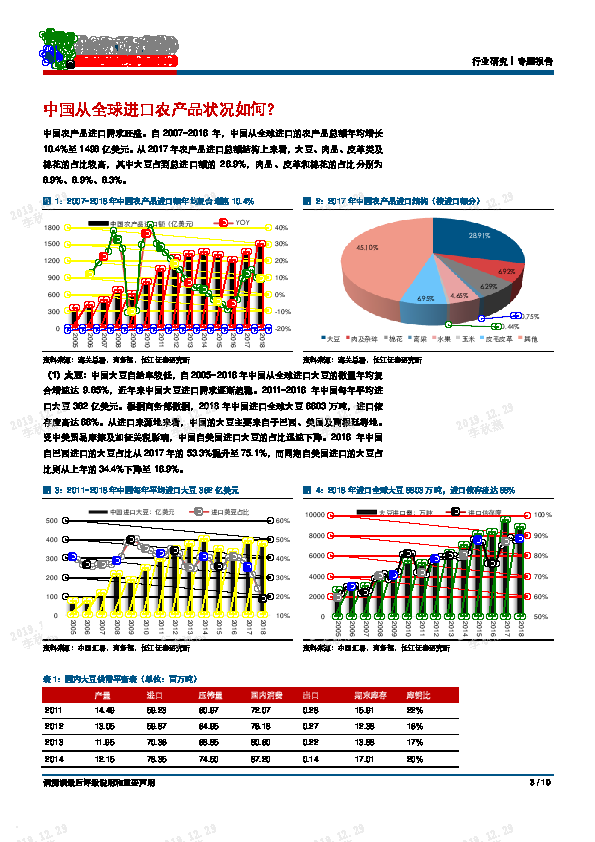

In [24]:
im.reset()
colors = [ "gray", "red", "blue", "green", "black", "yellow" ]
for i, curve in enumerate(report.curves):
    stroke = colors[i%len(colors)]
    im.draw_circles(curve["points"], radius=3, stroke=stroke, fill="white")
    im.draw_line(curve["points"], stroke=stroke, stroke_width=2)
im

__Note:__ Above, you'll notice the zig-zag pattern made by the curve that describes the gridlines. That's because `pdfminer` (and, hence, `pdfplumber`) currently only provide access to a the *points* on a curve, and not the actual *path* of the curve. The actual path can — as with the gridlines — include both "lineto" and "moveto" commands.

---

---

---